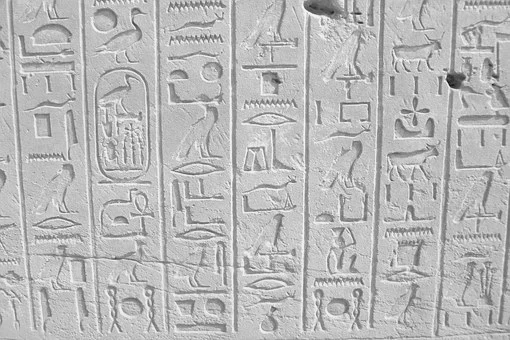

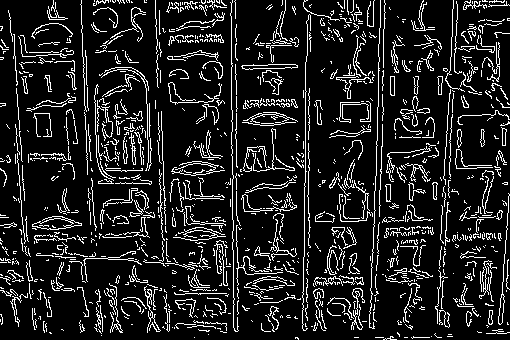

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#canny edge detection

img = cv.imread('pic1.jpg',0)
edges = cv.Canny(img,200,300)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()
cv2_imshow(img)
cv2_imshow(edges)

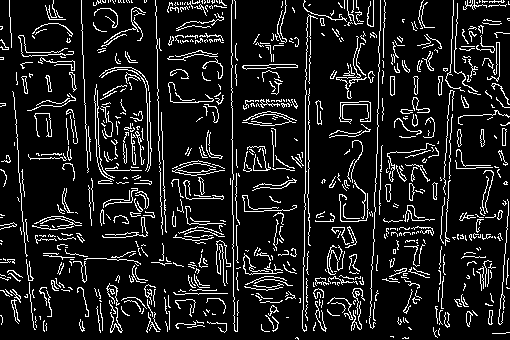

In [3]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
# cv2_imshow(image_sharp)
#canny edge detection

edges2 = cv.Canny(image_sharp,200,300)
cv2_imshow(edges2)

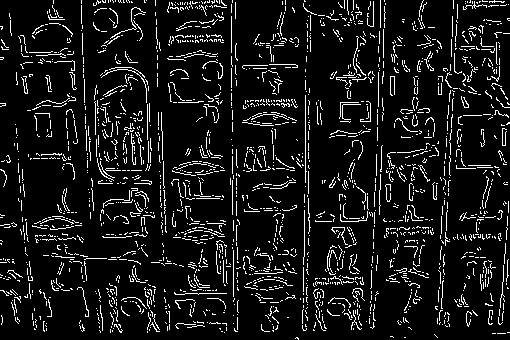

In [6]:
bitwiseAnd = cv.bitwise_and(edges, edges2)
cv2_imshow(bitwiseAnd)

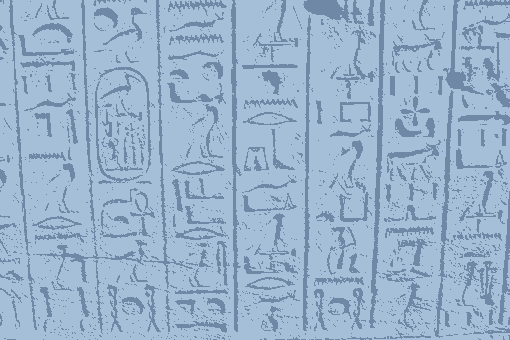

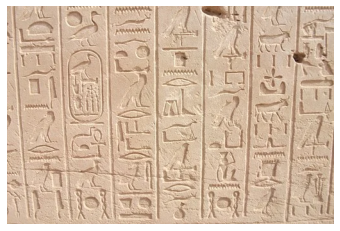

In [ ]:
#Using K-means


sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
plt.imshow(img)

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
cv2_imshow(result_image)

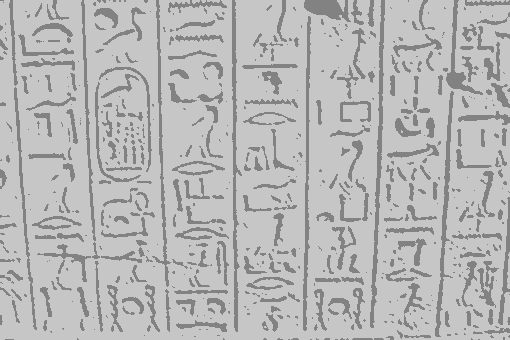

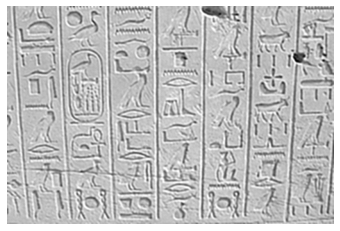

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
#Using K-means


sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)
plt.imshow(img)

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
cv2_imshow(result_image)

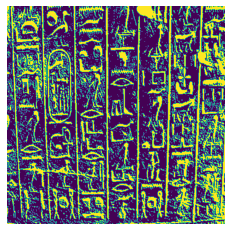

In [ ]:
#using Contour Detection

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
img = cv.resize(img,(512,512))

plt.axis('off');
plt.imshow(img)

gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

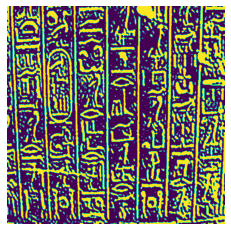

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
#using Contour Detection

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)
img = cv.resize(img,(512,512))

plt.axis('off');
plt.imshow(img)

gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

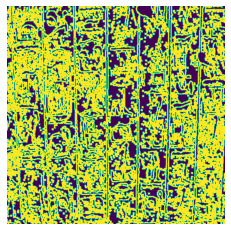

In [ ]:
edges = cv.dilate(cv.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

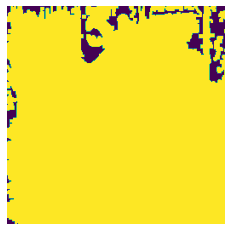

In [ ]:
cnt = sorted(cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

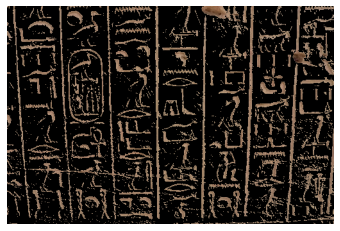

In [ ]:
from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

plt.axis('off')
plt.imshow(filtered)

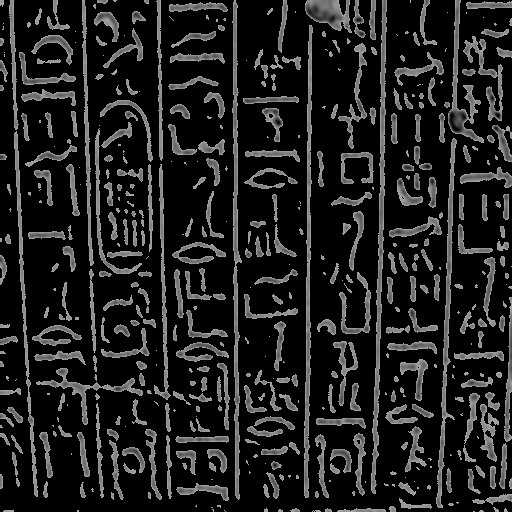

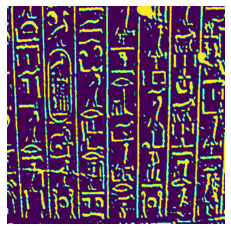

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
# cv2_imshow(image_sharp)

from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

# plt.axis('off')
# plt.imshow(filtered)
cv2_imshow(filtered)

# cv2_imshow(edges)
# noiseless_image_colored = cv.fastNlMeansDenoisingColored(img,None,20,20,7,21)
# cv2_imshow(noiseless_image_colored) 

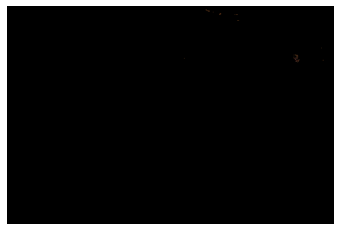

In [ ]:
#using Color Masking

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)


low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)


result = cv.bitwise_and(img, img, mask=mask)

plt.axis('off')
plt.imshow(result)